In [1]:
import os
import warnings
import matplotlib.pyplot as plt


import numpy.ma as ma
import xarray as xr

import rioxarray as rxr
from shapely.geometry import mapping, box
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep


In [2]:
modis_pre_path = "/uufs/chpc.utah.edu/common/home/u6000251/MODIS_PAR/MCD18A2.A2002165.h10v09.006.20171951457.hdf"
modis_pre = rxr.open_rasterio(modis_pre_path,
                              masked=True)


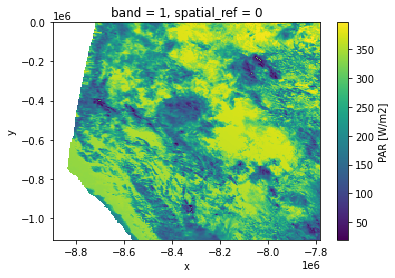

In [4]:
modis_pre.PAR.plot()

In [5]:
modis_pre

<xarray.Dataset>
Dimensions:          (y: 240, x: 240, band: 1)
Coordinates:
  * y                (y) float64 -2.317e+03 -6.95e+03 ... -1.105e+06 -1.11e+06
  * x                (x) float64 -8.893e+06 -8.889e+06 ... -7.791e+06 -7.786e+06
  * band             (band) int64 1
    spatial_ref      int64 0
Data variables:
    PAR              (band, y, x) float32 nan nan nan nan ... 103.5 96.49 118.8
    GMT_1800_PAR     (band, y, x) float32 nan nan nan nan ... 111.5 103.9 127.8
    GMT_2100_PAR     (band, y, x) float32 nan nan nan nan ... 30.27 28.2 34.71
    ViewZenithAngle  (band, y, x) float32 nan nan nan nan ... 12.8 12.42 11.99
    Direct           (band, y, x) float32 nan nan nan ... 5.114e-12 4.673e-06
    Diffuse          (band, y, x) float32 nan nan nan nan ... 103.5 96.49 118.8
    GMT_0000_PAR     (band, y, x) float32 nan nan nan nan ... 0.0 0.0 0.0 0.0
    GMT_0300_PAR     (band, y, x) float32 nan nan nan nan ... 0.0 0.0 0.0 0.0
    GMT_0600_PAR     (band, y, x) float32 nan nan nan nan ... 0.0 0.0 0.0 0.0
    GMT_0900_PAR     (band, y, x) float32 nan nan nan nan ... 0.0 0.0 0.0 0.0
    GMT_1200_PAR     (band, y, x) float32 nan nan nan nan ... 17.49 16.29 20.06
    GMT_1500_PAR     (band, y, x) float32 nan nan nan nan ... 101.7 94.74 116.6
Attributes: (12/58)
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDINSTRUMENTSHORTNAME.2:    MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:      Terra
    ASSOCIATEDPLATFORMSHORTNAME.2:      Aqua
    ASSOCIATEDSENSORSHORTNAME.1:        MODIS
    ASSOCIATEDSENSORSHORTNAME.2:        MODIS
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            -9.99999999910196
    SPSOPARAMETERS:                     END_OBJECT
    TileID:                             51010009
    VERSIONID:                          6
    VERTICALTILENUMBER:                 9
    WESTBOUNDINGCOORDINATE:             -81.23412894334